In [6]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

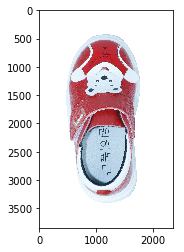

In [7]:
image=cv2.imread('/home/xelpmoc/Downloads/yellowbee/img1.jpg')
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
#removes all unwanted colours(grey, white, etc)
(height,width , channels) = image.shape
colored=[]
for i in range(height):
    for j in range(width):
        px=image[i,j]
        ms=int(px[0])*int(px[0])+int(px[1])*int(px[1])+int(px[2])*int(px[2])
        rms=math.sqrt(ms/3)
        if rms<211:colored.append(px)

In [4]:
from sklearn.cluster import KMeans
from collections import Counter

def get_dominant_color(image, k=4, image_processing_size = None):
    """
    takes an image as input
    returns the dominant color of the image as a list
    
    dominant color is found by running k means on the 
    pixels & returning the centroid of the largest cluster

    processing time is sped up by working with a smaller image; 
    this resizing can be done with the image_processing_size param 
    which takes a tuple of image dims as input

    >>> get_dominant_color(my_image, k=4, image_processing_size = (25, 25))
    [56.2423442, 34.0834233, 70.1234123]
    """
    #resize image if new dims provided
    #if image_processing_size is not None:
        #image = cv2.resize(image, image_processing_size, 
                            #interpolation = cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    #image = image.reshape((image.shape[0] * image.shape[1], 3))

    #cluster and assign labels to the pixels 
    clt = KMeans(n_clusters = k)
    labels = clt.fit_predict(image)

    #count labels to find most popular
    label_counts = Counter(labels)

    #subset out most popular centroid
    dominant_color = clt.cluster_centers_[label_counts.most_common(1)[0][0]]
    return list(dominant_color)

In [9]:
print(get_dominant_color(colored))

[64.72804528339563, 55.32685868476741, 171.06139808436754]


In [12]:
#converting rgb into hex code
'#%02x%02x%02x' % (171,55,64)

'#ab3740'